In [192]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [193]:
df_class = pd.read_csv('/Users/chrisbyrnes/Metis/Classification/ClassDataCSV.csv')

In [194]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   OneYear        9955 non-null   int64
 1   SciCont        9955 non-null   int64
 2   SciExpert      9955 non-null   int64
 3   EnePrior       9955 non-null   int64
 4   IncRel         9955 non-null   int64
 5   CliImp         9955 non-null   int64
 6   MedProf        9955 non-null   int64
 7   ClinTrials     9955 non-null   int64
 8   USHelp         9955 non-null   int64
 9   COVFED_NonBin  9955 non-null   int64
 10  COVED_Bin      9955 non-null   int64
 11  CovidThreat    9955 non-null   int64
 12  SocDist        9955 non-null   int64
 13  Vaccine        9955 non-null   int64
 14  VacToday       9955 non-null   int64
 15  Female         9955 non-null   int64
 16  PolLean        9955 non-null   int64
 17  Feature        9955 non-null   int64
dtypes: int64(18)
memory usage: 1.4 MB


In [195]:
df_class.head()

,OneYear,SciCont,SciExpert,EnePrior,IncRel,CliImp,MedProf,ClinTrials,USHelp,COVFED_NonBin,COVED_Bin,CovidThreat,SocDist,Vaccine,VacToday,Female,PolLean,Feature
0,1,0,0,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1
1,0,1,0,1,1,1,1,1,1,2,0,1,1,1,1,0,0,0
2,1,1,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,4,1,1,1,0,1,1,1,1
4,0,0,1,1,1,1,1,1,1,4,1,1,1,1,1,0,1,1


In [196]:
X = df_class[['SciCont','SciExpert','EnePrior','IncRel','CliImp', 'MedProf', 'ClinTrials', 'USHelp',
              'CovidThreat', 'SocDist', 'Vaccine','Female','PolLean', 'COVED_Bin','PolLean']]
y = df_class['OneYear']

In [197]:
print(X.shape)
print(y.shape)

(9955, 15)
(9955,)


In [198]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)

In [199]:
X_scaled, X_test, y, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

In [200]:
print(X_scaled.shape)
print(y.shape)

(7964, 15)
(7964,)


In [201]:
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='recall')
print(scores)
print(scores.mean())

[0.18181818 0.17272727 0.16363636 0.13636364 0.18181818 0.22727273
 0.21818182 0.17272727 0.16363636 0.20909091]
0.1827272727272727


In [202]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='recall')
    k_scores.append(scores.mean())
print(k_scores)

[0.1827272727272727, 0.024545454545454547, 0.08545454545454545, 0.022727272727272728, 0.05818181818181818, 0.019090909090909092, 0.03636363636363636, 0.012727272727272726, 0.02363636363636364, 0.010909090909090908, 0.019090909090909092, 0.010909090909090908, 0.013636363636363636, 0.00909090909090909, 0.011818181818181818, 0.00909090909090909, 0.010909090909090908, 0.006363636363636363, 0.00909090909090909, 0.007272727272727273, 0.00909090909090909, 0.007272727272727273, 0.009999999999999998, 0.004545454545454545, 0.008181818181818182, 0.005454545454545455, 0.008181818181818182, 0.005454545454545454, 0.007272727272727273, 0.006363636363636363]


Text(0, 0.5, 'Cross-Validated Recall')

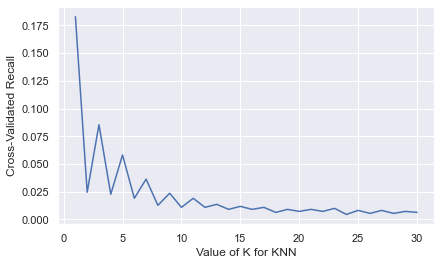

In [203]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Recall')

In [204]:
k_range = range(1, 100)
print(k_range)

range(1, 100)


In [205]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': range(1, 100)}


In [206]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='recall')

In [207]:
grid.fit(X_scaled, y);

In [208]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 1}
Best estimator:  KNeighborsClassifier(n_neighbors=1)
Best score:  0.1827272727272727


In [209]:
y_pred = grid.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))

0.8006027122049222
0.18110236220472442
0.19574468085106383


In [210]:
print("kNN confusion matrix: \n\n", confusion_matrix(y_test, grid.predict(X_test)))

kNN confusion matrix: 

 [[1548  189]
 [ 208   46]]


In [211]:
lr = LogisticRegression()
lr.fit(X_scaled, y)
scores = cross_val_score(lr, X_scaled, y, cv=10, scoring='recall')
print(scores)

[0.         0.         0.         0.00909091 0.00909091 0.
 0.         0.         0.01818182 0.02727273]


In [212]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_scaled, y)
scores = cross_val_score(lr, X_scaled, y, cv=10, scoring='recall')
print(scores)

[0.65454545 0.66363636 0.62727273 0.62727273 0.68181818 0.67272727
 0.65454545 0.5        0.55454545 0.58181818]


In [213]:
y_pred = lr.predict(X_test)
print(metrics.recall_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

0.6417322834645669
0.5700652938222


In [214]:
print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, lr.predict(X_test)))

Logistic Regression confusion matrix: 

 [[972 765]
 [ 91 163]]


In [215]:
y_predict = (lr.predict_proba(X_test)[:,1] > 0.3)
print("Threshold of 0.4:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.4:
Precision: 0.1424,   Recall: 0.9528


In [216]:
print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, lr.predict(X_test)))

Logistic Regression confusion matrix: 

 [[972 765]
 [ 91 163]]


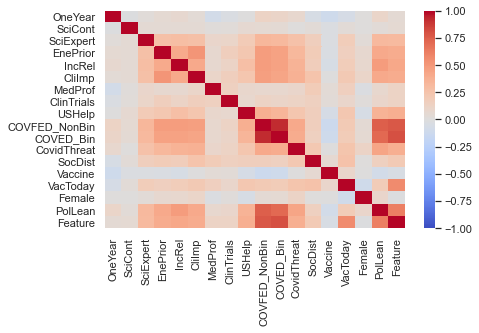

In [217]:
sns.heatmap(df_class.corr(), cmap="coolwarm",vmin=-1, vmax=1)
plt.show()

In [218]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [219]:
decisiontree = DecisionTreeClassifier(max_depth=4)
decisiontree.fit(X_scaled, y)
decisiontree.score(X_test, y_test)
scores = cross_val_score(decisiontree, X_scaled, y, cv=5, scoring='recall')
print(scores)

[0.02272727 0.01363636 0.00454545 0.01818182 0.02272727]


In [220]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_scaled, y)
scores = cross_val_score(randomforest, X_scaled, y, cv=5, scoring='recall')
print(scores)

[0.04090909 0.03636364 0.03636364 0.01818182 0.06818182]


In [221]:
import imblearn.over_sampling

In [222]:
X = df_class[['SciCont','SciExpert','EnePrior','IncRel','CliImp', 'MedProf', 'ClinTrials', 'USHelp',
              'CovidThreat', 'SocDist', 'Vaccine','Female','PolLean']]
y = df_class['OneYear']

In [223]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
n_pos = np.sum(y_tr == 1)
n_neg = np.sum(y_tr == 0)
ratio = {1 : n_pos * 6, 0 : n_neg} 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=5)
X_tr_rs, y_tr_rs = ROS.fit_resample(X_tr,y_tr)

In [224]:
lr = LogisticRegression(solver='liblinear') 
lr.fit(X_tr, y_tr)

lr_os = LogisticRegression(solver='liblinear') 
lr_os.fit(X_tr_rs, y_tr_rs)

LogisticRegression(solver='liblinear')

In [225]:
y_pred = lr.predict(X_test)
print(metrics.recall_score(y_test, y_pred))

y_pred_os = lr_os.predict(X_test)
print(metrics.recall_score(y_test, y_pred_os))

0.003937007874015748
0.5511811023622047


In [226]:
print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, lr_os.predict(X_test)))

Logistic Regression confusion matrix: 

 [[1133  604]
 [ 114  140]]


In [227]:
from sklearn.naive_bayes import BernoulliNB

In [228]:
nb = BernoulliNB()
nb.fit(X_tr_rs,y_tr_rs)
nb.score(X_test,y_test)

0.5580110497237569

In [229]:
y_pred = nb.predict(X_test)
print(metrics.recall_score(y_test, y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))

0.6732283464566929
0.5580110497237569
0.17665289256198347
0.27986906710310966


In [230]:
print("Naive Bayes confusion matrix: \n\n", confusion_matrix(y_test, nb.predict(X_test)))

Naive Bayes confusion matrix: 

 [[940 797]
 [ 83 171]]


In [231]:
###### Work on modifying chosen logistic regression model

In [347]:
X = df_class[['SciExpert','CovidThreat', 'Vaccine', 'COVED_Bin','PolLean']]
y = df_class['OneYear']

In [348]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)

In [349]:
X_scaled, X_test, y, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

In [350]:
lr = LogisticRegression(class_weight = 'balanced',C = 1000)
lr.fit(X_scaled, y)
scores = cross_val_score(lr, X_scaled, y, cv=10, scoring='recall')
print(scores)

[0.73636364 0.75454545 0.73636364 0.70909091 0.70909091 0.71818182
 0.67272727 0.62727273 0.69090909 0.7       ]


In [351]:
y_pred = lr.predict(X_test)
print(metrics.recall_score(y_test, y_pred))

print(lr.coef_)

0.7283464566929134
[[-0.09029972  0.10227852 -0.24188962  0.2988268   0.07216919]]


In [352]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

ROC AUC score =  0.6327487885257865


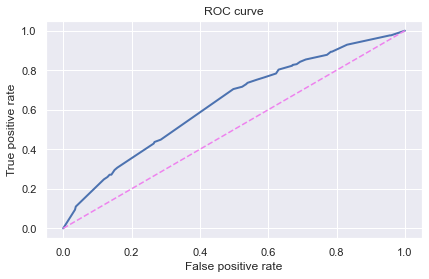

In [353]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

In [354]:
print(metrics.precision_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.16621743036837378
0.27066569129480617


In [355]:
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_scaled_smote, y_smote = smote.fit_resample(X_scaled, y)

lr_smote = LogisticRegression(solver='liblinear') 
lr_smote.fit(X_scaled_smote, y_smote)

print(metrics.f1_score(y_test, lr_smote.predict(X_test)))
print(metrics.recall_score(y_test, lr_smote.predict(X_test)))      

0.27870150435471097
0.6929133858267716


In [356]:
y_predict = (lr.predict_proba(X_test)[:,1] > 0.45)
print("Threshold of 0.45:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.45:
Precision: 0.1570,   Recall: 0.8031


Logistic Regression Model best F1 score 0.271 at prob decision threshold >= 0.475


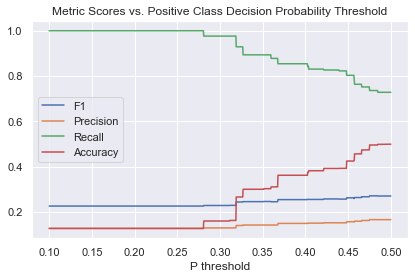

In [370]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

X_val, y_val = X_test, y_test 

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = lr.predict_proba(X_val)[:,1] # positive class probs
f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'],  loc='best')
plt.xlabel('P threshold')

#bbox_to_anchor=(1.05, 0),
best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))
plt.savefig('Logistic_Metrics.PNG', transparent=True)

In [372]:
y_predict = (lr.predict_proba(X_test)[:,1] > 0.45)
print("Threshold of 0.45:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.45:
Precision: 0.1570,   Recall: 0.8031


In [359]:
print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, lr.predict(X_test)))

Logistic Regression confusion matrix: 

 [[809 928]
 [ 69 185]]
